# 1

Read the data without missing values.

In [1]:
import numpy as np

data1=np.loadtxt('dataset1.txt');

nItems, nMonths = data1.shape

# 2

My basis regression model has the form $y = Ax + \epsilon$. This is a least squares problem. We need to project y to range(A) orthogonally. 

# 3

Apply the 3 methods for the regression model. At the end, a prediction for 6 next months are calculated. 

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

def plot_data():

    fig, ax = plt.subplots(figsize=(16, 10))

    #plt.figure(figsize=(16, 6))
    #plt.hold()
    for i in range(nItems):
        ax.plot(np.arange(len(data1[i,:])), data1[i,:], marker='o', label=('item'+str(i)))

    ax.set_xlabel('Months')
    ax.set_ylabel('Number of items sold')
    #plt.show()
    
    return fig, ax

def plot_fit(ax, A, a, x_range=np.arange(nMonths)):
    y_reg = np.dot(A, a)
    ax.plot(x_range, y_reg, marker='|', ms=15)

a_qr [ 374.9533333333334326    0.6743478260869584]
a_sv [ 374.9533333333336032    0.6743478260869402]
a_no [ 374.9533333333332621    0.6743478260869596]
a_qr [ 470.9500000000001592    5.6999999999999984]
a_sv [ 470.9500000000002728    5.6999999999999815]
a_no [ 470.9499999999999886    5.7000000000000002]
a_qr [ 871.4033333333335349   11.2439130434782584]
a_sv [ 871.4033333333337623   11.2439130434782442]
a_no [ 871.4033333333335349   11.2439130434782424]
a_qr [ 535.9600000000001501    5.9599999999999946]
a_sv [ 535.9600000000001501    5.9600000000000009]
a_no [ 535.9599999999999227    5.96              ]
a_qr [ 869.6566666666670926    7.9356521739130326]
a_sv [ 869.6566666666668652    7.9356521739130272]
a_no [ 869.6566666666667516    7.9356521739130406]


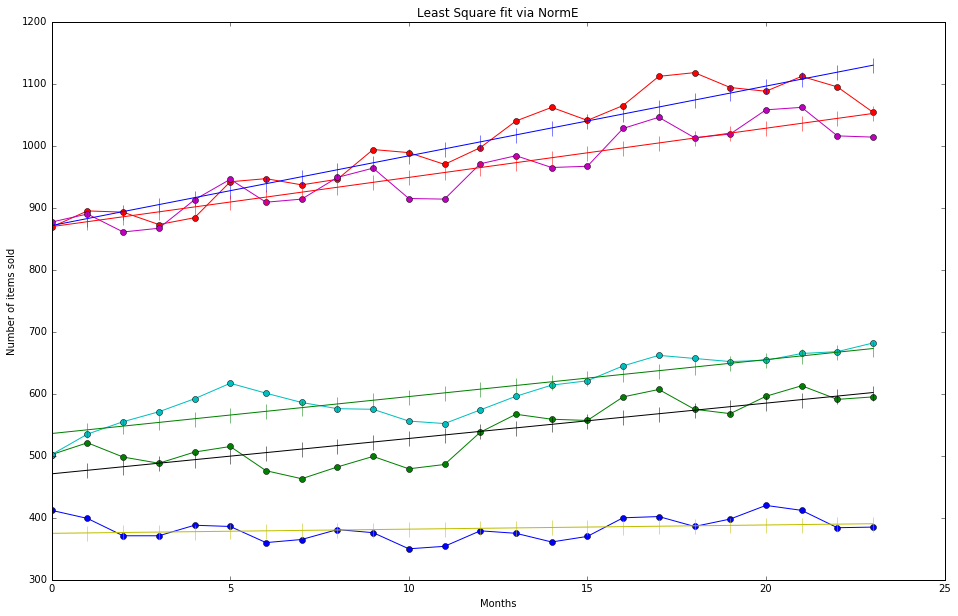

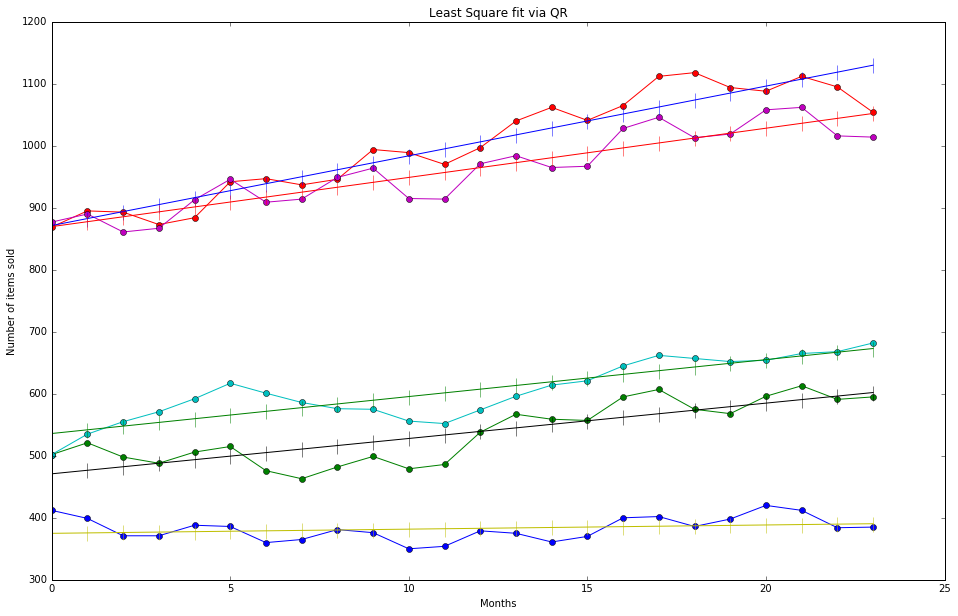

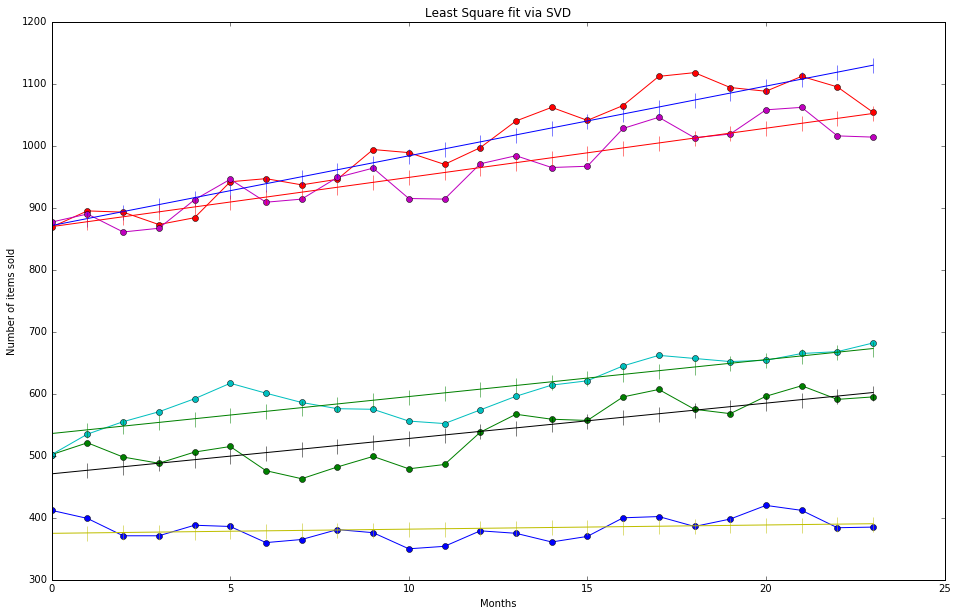

In [3]:
from scipy import linalg as la

#Least squares solvers

def lst_sqr_norme(A, y):
    l = np.dot(A.transpose(), A)
    y_h = np.dot(A.transpose(), y)
    a_norme = la.solve(l, y_h)
    return a_norme

def lst_sqr_qr(Q_h, R_h, y):
    y_h = np.dot(Q_h.transpose(), y)
    a_qr = la.solve_triangular(R_h, y_h)
    return a_qr

def lst_sqr_svd(U_h, S_h, V_t, y):
    y_h = np.dot(U_h.transpose(), y)
    w = np.divide(y_h, S_h)
    a_svd = np.dot(V_t.transpose(), w)
    return a_svd

#Create figures for the 3 methods
fig_norme, ax_norme = plot_data()
fig_qr, ax_qr = plot_data()
fig_svd, ax_svd = plot_data()
ax_qr.set_title('Least Square fit via QR')
ax_svd.set_title('Least Square fit via SVD')
ax_norme.set_title('Least Square fit via NormE')

#Construct A
A = np.arange(nMonths)
A = np.vstack((np.ones(nMonths), A)).transpose()

nMonths_pred=6

#Prediction matrix
A_pred = np.vstack((np.ones(nMonths_pred), np.arange(nMonths,nMonths+nMonths_pred))).transpose()

#Factorizations of A matrices
Q_h,R_h = np.linalg.qr(A, mode='reduced')
U_h, S_h, V_t = la.svd(A, full_matrices=0)

pred_norme = np.zeros((nItems, nMonths_pred))
pred_qr = np.zeros((nItems, nMonths_pred))
pred_svd = np.zeros((nItems, nMonths_pred))

#Coefficient matrices that involve constant term as well
a_norme = np.zeros((nItems, 2))
a_qr = np.zeros((nItems, 2))
a_svd = np.zeros((nItems, 2))

np.set_printoptions(precision=16)

#For each item
for i in range(nItems):
    y = data1[i,:]
    
    #Calculate qr fitting
    a_qr[i,:] = lst_sqr_qr(Q_h, R_h, y)
    print('a_qr', a_qr[i,:])
    plot_fit(ax_qr, A, a_qr[i,:])
    pred_qr[i,:] = np.dot(A_pred, a_qr[i,:])
    
    #Calculate svd fitting
    a_svd[i,:] = lst_sqr_svd(U_h, S_h, V_t, y)
    print('a_sv', a_svd[i,:])
    plot_fit(ax_svd, A, a_svd[i,:])
    pred_svd[i,:] = np.dot(A_pred, a_svd[i,:])
    
    #Calculate normal equation fitting
    a_norme[i,:] = lst_sqr_norme(A, y)
    print('a_no', a_norme[i,:])
    plot_fit(ax_norme, A, a_norme[i,:])
    pred_norme[i,:] = np.dot(A_pred, a_norme[i,:])

#fig

Calculate the relative error among the 3 methods. Columns and rows are 'NormE', 'QR' and 'SVD' just like in the project description.

In [5]:
np.set_printoptions(precision=8)

# Columns and rows are NormE, QR, SVD as in the project description
rel_err = np.zeros((3,3))

#Prediction matrices for the 3 methods
pred = np.zeros((3, nItems, nMonths_pred))
pred[0,:,:] = pred_norme
pred[1,:,:] = pred_qr
pred[2,:,:] = pred_svd

for i in range(3):
    for j in range(3):
        if i==j: #Diagonals are simply zero.
            continue
        #Calculate the norm of x-y, the nominator
        x_y_norm = np.apply_along_axis(la.norm, 0, pred[i,:,:]-pred[j,:,:])
        #Calculate the norm of y, the denominator
        y_norm = np.apply_along_axis(la.norm, 0, pred[j,:,:])
        rel_err[i,j] = np.sum(np.divide(x_y_norm, y_norm)) 

print('Total relative error between predictions generated by different computational methods \n')
print(rel_err)

Total relative error between predictions generated by different computational methods 

[[  0.00000000e+00   1.67209489e-15   1.73340446e-15]
 [  1.67209489e-15   0.00000000e+00   2.22543387e-15]
 [  1.73340446e-15   2.22543387e-15   0.00000000e+00]]


# 4

Read the ground truth data from given dataset and calculate the error.

In [6]:
testdata1=np.loadtxt('testdata1.txt')

err_tru = np.zeros(3)

for i in range(3):
    x_y_norm = np.apply_along_axis(la.norm, 0, pred[i,:,:]-testdata1)
    y_norm = np.apply_along_axis(la.norm, 0, testdata1)
    err = np.divide(x_y_norm, y_norm)
    print('Error for items compared to method '+str(i))
    print(err)
    err_tru[i] = np.sum(err)
    
print('\nTotal errors for each method:')
print(err_tru)
    

Error for items compared to method 0
[ 0.0369148   0.05358079  0.0516899   0.04216514  0.073079    0.09901493]
Error for items compared to method 1
[ 0.0369148   0.05358079  0.0516899   0.04216514  0.073079    0.09901493]
Error for items compared to method 2
[ 0.0369148   0.05358079  0.0516899   0.04216514  0.073079    0.09901493]

Total errors for each method:
[ 0.35644456  0.35644456  0.35644456]


# 5

Predictions calculated by the 3 methods.

In [7]:
print('Predictions via NormE')
print(pred_norme)

print('\nPredictions via QR')
print(pred_qr)

print('\nPredictions via SVD')
print(pred_svd)

Predictions via NormE
[[  391.13768116   391.81202899   392.48637681   393.16072464
    393.83507246   394.50942029]
 [  607.75         613.45         619.15         624.85         630.55
    636.25      ]
 [ 1141.25724638  1152.50115942  1163.74507246  1174.98898551
   1186.23289855  1197.47681159]
 [  679.           684.96         690.92         696.88         702.84
    708.8       ]
 [ 1060.11231884  1068.04797101  1075.98362319  1083.91927536
   1091.85492754  1099.79057971]]

Predictions via QR
[[  391.13768116   391.81202899   392.48637681   393.16072464
    393.83507246   394.50942029]
 [  607.75         613.45         619.15         624.85         630.55
    636.25      ]
 [ 1141.25724638  1152.50115942  1163.74507246  1174.98898551
   1186.23289855  1197.47681159]
 [  679.           684.96         690.92         696.88         702.84
    708.8       ]
 [ 1060.11231884  1068.04797101  1075.98362319  1083.91927536
   1091.85492754  1099.79057971]]

Predictions via SVD
[[  391.1

# 6, 7, 8

My setup for the least squares problem to use the past data is $y = Aw + \epsilon$. For each item, we have vector $y = \left[ y_{D_{\tau}:N} \right]$. For each item, $A$ has the form $N \times (D_{\tau}*I)$ where each row $t$ is the vectorized form of the window of length $D_{\tau}$ for $y_t$. The weight vector for an item has the length of $D_{\tau}*I$ which is reshaped to the form $(D_{\tau} \times I)$ for each item. Thus at the end, the weight matrix $W$ has the form $I \times I \times D_\tau$.

The vectorization of the matrices for each item provides us utilizing the the structure of the least squares problem. We solve it for each item and reshape the matrices into desired forms at the end.

W:
 [[[-1.77022353  0.69648956  2.45554813]
  [-0.65963711  0.43118709  0.77308179]
  [-0.9555456   0.25781707  0.13531047]
  [-0.68186251  1.92543937 -1.22667927]
  [ 2.4020177  -1.65389616 -0.61564111]]

 [[-2.44887034  2.09360526  0.86434124]
  [-1.41532137  0.4177191   1.71853698]
  [-0.6747169   0.85947776 -0.43084765]
  [-0.94271044  2.023402   -0.75527904]
  [ 2.92570159 -2.62072591 -0.28288751]]

 [[-7.43267838  3.67098088  4.8426926 ]
  [-2.62085479  2.11336141  2.60480968]
  [-2.92871781  0.25347885  0.62758169]
  [-1.38829539  5.20914141 -4.14110947]
  [ 7.77275082 -5.05111247 -0.88926308]]

 [[-3.20407201  1.70793444  2.0058624 ]
  [-1.23428446  0.6084632   1.74293672]
  [-1.21892702  0.30996454 -0.4415263 ]
  [-0.61994235  1.87616738 -0.39299973]
  [ 3.5277008  -1.89596497 -0.93431192]]

 [[-5.87469946  3.13889105  4.29939128]
  [-2.491884    1.4242921   2.29153872]
  [-2.64745325  1.09754185 -0.25753006]
  [-1.2884805   4.37558663 -2.61899148]
  [ 6.88306216 -4.84186591 -

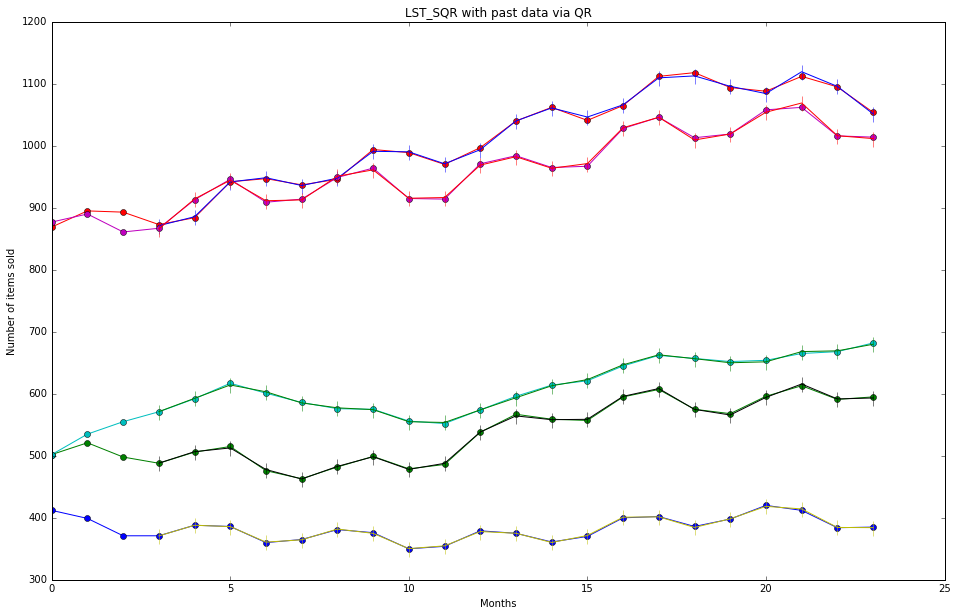

In [8]:
%matplotlib inline

D_tau = 3

#Plot the data
fig_qr, ax_qr = plot_data()
ax_qr.set_title('LST_SQR with past data via QR')

#Vectorize the first window of length D_tau to obtain the first row of the matrix A
A = data1[:,0:D_tau].flatten()

#Append the vectorized forms of the shifted windows over the data.
for t in range(D_tau+1, nMonths):
    A = np.vstack((A, data1[:,t-D_tau:t].flatten()))

#Calculate the QR factorization of A
Q_h,R_h = np.linalg.qr(A, mode='reduced')

#The weight matrix is initialized. For each item, we'll solve least squares problem.
W = np.zeros((nItems, nItems, D_tau))

#For each item
for i in range(nItems):
    y = data1[i,D_tau:] #Observations for item i

    #Project the observations into range(A) via the QR method
    w_qr = lst_sqr_qr(Q_h, R_h, y)
    #print('w_qr', w_qr)
    plot_fit(ax_qr, A, w_qr, np.arange(D_tau, nMonths))
    
    #By now, w vector has the form I*D_tau. Reshape it to IxD_tau matrix and save the weights for item i.
    W[i,:,:] = w_qr.reshape((nItems, D_tau))
    
print('W:\n',W)

Predictions for the next month.

In [9]:
A_pred = data1[:,-D_tau:].flatten()
print('Prediction for the next month:')
for i in range(nItems):    
    y_pred = np.dot(A_pred, W[i,:,:].flatten())
    print('Item'+str(i), y_pred)

Prediction for the next month:
Item0 398.807713871
Item1 633.539658705
Item2 1039.67212076
Item3 712.372401213
Item4 1052.8635186


# 9

In this part, I used the alternating least squares method. I first remove the rows that correspond to the NaN's in y. I leave all the NaN observations on the right hand side of the equation and solve it for the NaN values with a random W matrix. Then, the idea is to calculate the weight matrix as in the above and calculate the NaN valuesagain with the new W matrix. These steps are repeated until W and NaN values converge.

However, leaving the NaN's on the right hand-side of the equation and forming a least squares problem is quite hard to work with indices. I am totally confused about the indexing of the values and, thus, forming a least squares problem with the matrices for NaN values.

In [144]:
# NaN part

data2=np.loadtxt('dataset2.txt');

nItems, nMonths = data2.shape

D_tau = 3

data_isnan = np.isnan(data2).flatten()
nan_ind = np.where(data_isnan)[0] #Indices of all the NaN values in the data.
T = len(nan_ind) #Total number of NaN values

#A = data2[:,0:D_tau].flatten()
#for t in range(D_tau+1, nMonths):
#    A = np.vstack((A, data2[:,t-D_tau:t].flatten()))


#For each item
for i in range(1):
    y = data2[i,D_tau:] #Observations for item i

    #Remove the NaN's in y
    y_not_nan = np.logical_not(np.isnan(y)) #Indices of not NaN values
    iy = np.where(y_not_nan)[0]
    y = y[y_not_nan]
    
    U = np.zeros((len(y), T))
    
    #Append the vectorized window of length D_tau for the corresponding not NaN values in y
    A = data2[:,iy[0]:iy[0]+D_tau].flatten()
    for t in iy[1:]:
        A = np.vstack((A, data2[:,t:t+D_tau].flatten()))

    
    a_nan = np.isnan(A)
    a_not_nan = np.logical_not(a_nan)

    W = np.random.randn(D_tau*nItems) #random initialize W
    
    #Left hand-side of the equation. Unknown values are left on the right hand-side with the matrix W.
    alpha = y - np.dot(A[a_not_nan], np.tile(W, (A.shape[0],1))[a_not_nan])

    #We need to form a matrix multiplication on the right hand-side like alpha = Ux where x is the vector 
    #of all unknown values. I could not form the matrix U.
    for j in range(A.shape[0]):
        a_nan = np.isnan(A[j,:])
        tup = np.where(a_nan)
        nan_ind_tau = tup[0] + nItems*t

        ix = np.in1d(nan_ind, nan_ind_tau)
        loc_weight = np.where(ix)

        #U[j,:] = np.zeros(T)
        U[j,loc_weight] = W[tup[0]]

print(U)

ValueError: shape mismatch: value array of shape (3,) could not be broadcast to indexing result of shape (1,0)

In [148]:
loc_weight

(array([], dtype=int64),)

In [98]:
a=np.arange(3)
print(a)
a=a+1
ix = np.in1d(a, [1,2])
np.where(ix)

a[np.array([1,2])] = [5,6]
print(a)

[0 1 2]
[1 5 6]
